# Electric Vehicle Type Prediction

In [56]:
import pandas as pd
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [57]:
df=pd.read_csv("C:\\Users\\Gayu\\Documents\\pga 29\\us_car_data.csv")

In [58]:
df

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,CAFV,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Longitude,latitude
0,Thurston,Tumwater,WA,98512,2019,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,220,0,22,242565116,PUGET SOUND ENERGY INC,53067010910,-122.913102,47.013593
1,Island,Clinton,WA,98236,2022,NISSAN,LEAF,Battery Electric Vehicle,Eligibility unknown as battery range has not b...,0,0,10,183272785,PUGET SOUND ENERGY INC,53029972000,-122.359364,47.979655
2,Snohomish,Snohomish,WA,98290,2020,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,266,0,44,112552366,PUGET SOUND ENERGY INC,53061052502,-122.091505,47.915555
3,King,Seattle,WA,98134,2020,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,322,0,11,6336319,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033009300,-122.329815,47.579810
4,Snohomish,Edmonds,WA,98020,2013,TESLA,MODEL S,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,208,69900,21,186212960,PUGET SOUND ENERGY INC,53061050403,-122.375070,47.808070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134469,King,Yarrow Point,WA,98004,2020,TESLA,MODEL S,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,330,0,48,124776627,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033024100,-122.201905,47.613850
134470,King,Burien,WA,98168,2021,TESLA,MODEL Y,Battery Electric Vehicle,Eligibility unknown as battery range has not b...,0,0,33,142857676,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033027100,-122.286460,47.476130
134471,Pierce,Gig Harbor,WA,98335,2022,TESLA,MODEL S,Battery Electric Vehicle,Eligibility unknown as battery range has not b...,0,0,26,220157724,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,53053072407,-122.583545,47.323449
134472,Grant,Ephrata,WA,98823,2023,HYUNDAI,IONIQ 5,Battery Electric Vehicle,Eligibility unknown as battery range has not b...,0,0,13,223872596,PUD NO 2 OF GRANT COUNTY,53025010402,-119.555130,47.319360


In [59]:
#data preparation and celaning




In [60]:
df.shape

(134474, 17)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134474 entries, 0 to 134473
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   County                 134474 non-null  object 
 1   City                   134474 non-null  object 
 2   State                  134474 non-null  object 
 3   Postal Code            134474 non-null  int64  
 4   Model Year             134474 non-null  int64  
 5   Make                   134474 non-null  object 
 6   Model                  134474 non-null  object 
 7   Electric Vehicle Type  134474 non-null  object 
 8   CAFV                   134474 non-null  object 
 9   Electric Range         134474 non-null  int64  
 10  Base MSRP              134474 non-null  int64  
 11  Legislative District   134474 non-null  int64  
 12  DOL Vehicle ID         134474 non-null  int64  
 13  Electric Utility       134474 non-null  object 
 14  2020 Census Tract      134474 non-nu

In [62]:
df.columns

Index(['County', 'City', 'State', 'Postal Code', 'Model Year', 'Make', 'Model',
       'Electric Vehicle Type', 'CAFV', 'Electric Range', 'Base MSRP',
       'Legislative District', 'DOL Vehicle ID', 'Electric Utility',
       '2020 Census Tract', 'Longitude', 'latitude'],
      dtype='object')

In [63]:
df.isnull().sum()

County                   0
City                     0
State                    0
Postal Code              0
Model Year               0
Make                     0
Model                    0
Electric Vehicle Type    0
CAFV                     0
Electric Range           0
Base MSRP                0
Legislative District     0
DOL Vehicle ID           0
Electric Utility         0
2020 Census Tract        0
Longitude                0
latitude                 0
dtype: int64

In [64]:
df.head()

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,CAFV,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Longitude,latitude
0,Thurston,Tumwater,WA,98512,2019,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,220,0,22,242565116,PUGET SOUND ENERGY INC,53067010910,-122.913102,47.013593
1,Island,Clinton,WA,98236,2022,NISSAN,LEAF,Battery Electric Vehicle,Eligibility unknown as battery range has not b...,0,0,10,183272785,PUGET SOUND ENERGY INC,53029972000,-122.359364,47.979655
2,Snohomish,Snohomish,WA,98290,2020,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,266,0,44,112552366,PUGET SOUND ENERGY INC,53061052502,-122.091505,47.915555
3,King,Seattle,WA,98134,2020,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,322,0,11,6336319,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033009300,-122.329815,47.579810
4,Snohomish,Edmonds,WA,98020,2013,TESLA,MODEL S,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,208,69900,21,186212960,PUGET SOUND ENERGY INC,53061050403,-122.375070,47.808070


In [65]:
df.tail()

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,CAFV,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Longitude,latitude
134469,King,Yarrow Point,WA,98004,2020,TESLA,MODEL S,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,330,0,48,124776627,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033024100,-122.201905,47.613850
134470,King,Burien,WA,98168,2021,TESLA,MODEL Y,Battery Electric Vehicle,Eligibility unknown as battery range has not b...,0,0,33,142857676,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033027100,-122.286460,47.476130
134471,Pierce,Gig Harbor,WA,98335,2022,TESLA,MODEL S,Battery Electric Vehicle,Eligibility unknown as battery range has not b...,0,0,26,220157724,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,53053072407,-122.583545,47.323449
134472,Grant,Ephrata,WA,98823,2023,HYUNDAI,IONIQ 5,Battery Electric Vehicle,Eligibility unknown as battery range has not b...,0,0,13,223872596,PUD NO 2 OF GRANT COUNTY,53025010402,-119.555130,47.319360
134473,Kitsap,Port Orchard,WA,98366,2014,FORD,C-MAX,Plug-in Hybrid Electric Vehicle,Not eligible due to low battery range,19,0,26,171102032,PUGET SOUND ENERGY INC,53035092500,-122.639265,47.537300


In [66]:
df.nunique()

County                       39
City                        454
State                         1
Postal Code                 530
Model Year                   22
Make                         36
Model                       125
Electric Vehicle Type         2
CAFV                          3
Electric Range              102
Base MSRP                    31
Legislative District         49
DOL Vehicle ID           134474
Electric Utility             75
2020 Census Tract          1765
Longitude                   529
latitude                    530
dtype: int64

In [67]:
df.duplicated().sum()

0

In [68]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract,Longitude,latitude
count,134474.000000,134474.000000,134474.000000,134474.000000,134474.000000,1.344740e+05,1.344740e+05,134474.000000,134474.000000
mean,98259.228520,2019.657250,74.730208,1451.396069,29.499911,2.063218e+08,5.303964e+10,-122.092668,47.467715
std,303.069045,3.001443,98.776037,9691.900720,14.786294,8.590842e+07,1.617660e+07,1.006671,0.615275
min,98001.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,5.300195e+10,-124.625140,45.583863
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.601798e+08,5.303301e+10,-122.405565,47.357985
50%,98122.000000,2021.000000,21.000000,0.000000,34.000000,2.059191e+08,5.303303e+10,-122.296385,47.613850
75%,98370.000000,2022.000000,150.000000,0.000000,43.000000,2.308773e+08,5.305307e+10,-122.151665,47.715580
max,99403.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.307794e+10,-117.044370,48.996340


In [69]:
#Exploratory data analysis and visualization





In [70]:
df["Electric Vehicle Type"].value_counts()

Electric Vehicle Type
Battery Electric Vehicle              103424
Plug-in Hybrid Electric Vehicle        31050
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

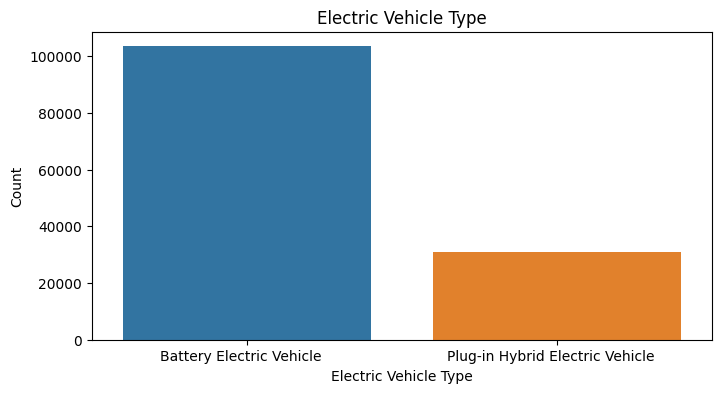

In [71]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x="Electric Vehicle Type",hue='Electric Vehicle Type')
plt.xlabel("Electric Vehicle Type")
plt.ylabel("Count")
plt.title("Electric Vehicle Type")
plt.show

In [72]:
df["Make"].value_counts()

Make
TESLA                   61650
NISSAN                  13138
CHEVROLET               11417
FORD                     6876
BMW                      5881
KIA                      5484
TOYOTA                   4857
VOLKSWAGEN               3518
VOLVO                    2965
AUDI                     2720
JEEP                     2608
HYUNDAI                  2390
CHRYSLER                 2222
RIVIAN                   1805
PORSCHE                   951
FIAT                      807
HONDA                     786
MERCEDES-BENZ             777
MITSUBISHI                747
MINI                      742
POLESTAR                  657
SMART                     277
SUBARU                    272
JAGUAR                    222
LINCOLN                   211
LUCID                     141
CADILLAC                  119
LEXUS                      80
GENESIS                    67
LAND ROVER                 42
FISKER                     15
MAZDA                      12
AZURE DYNAMICS              8
TH!NK

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, 'TESLA'),
  Text(1, 0, 'NISSAN'),
  Text(2, 0, 'BMW'),
  Text(3, 0, 'AUDI'),
  Text(4, 0, 'TOYOTA'),
  Text(5, 0, 'KIA'),
  Text(6, 0, 'FIAT'),
  Text(7, 0, 'FORD'),
  Text(8, 0, 'CHEVROLET'),
  Text(9, 0, 'HYUNDAI'),
  Text(10, 0, 'VOLVO'),
  Text(11, 0, 'VOLKSWAGEN'),
  Text(12, 0, 'CHRYSLER'),
  Text(13, 0, 'SMART'),
  Text(14, 0, 'RIVIAN'),
  Text(15, 0, 'SUBARU'),
  Text(16, 0, 'JEEP'),
  Text(17, 0, 'HONDA'),
  Text(18, 0, 'LINCOLN'),
  Text(19, 0, 'LUCID'),
  Text(20, 0, 'PORSCHE'),
  Text(21, 0, 'MITSUBISHI'),
  Text(22, 0, 'POLESTAR'),
  Text(23, 0, 'MERCEDES-BENZ'),
  Text(24, 0, 'MINI'),
  Text(25, 0, 'JAGUAR'),
  Text(26, 0, 'CADILLAC'),
  Text(27, 0, 'LEXUS'),
  Text(28, 0, 'GENESIS'),
  Text(29, 0, 'WHEEGO ELECTRIC CARS'),
  Text(30, 0, 'FISKER'),
  Text(3

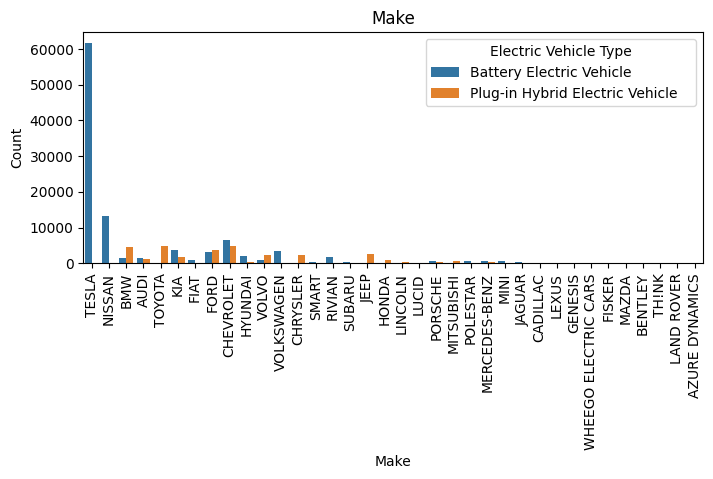

In [73]:
plt.figure(figsize=(8,3))
sns.countplot(data=df, x="Make",hue='Electric Vehicle Type')
plt.xlabel("Make")
plt.ylabel("Count")
plt.title("Make")
plt.xticks(rotation=90)

In [74]:
df["Model"].value_counts().sum()

134474

In [75]:
df["Model"].nunique()

125

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124],
 [Text(0, 0, 'MODEL 3'),
  Text(1, 0, 'LEAF'),
  Text(2, 0, 'MODEL S'),
  Text(3, 0, 'I3'),
  Text(4, 0, 'Q5 E'),
  Text(5, 0, 'PRIUS PRIME'),
  Text(6, 0, 'NIRO'),
  Text(7, 0, 'MODEL Y'),
  Text(8, 0, '500'),
  Text(9, 0, 'C-MAX'),


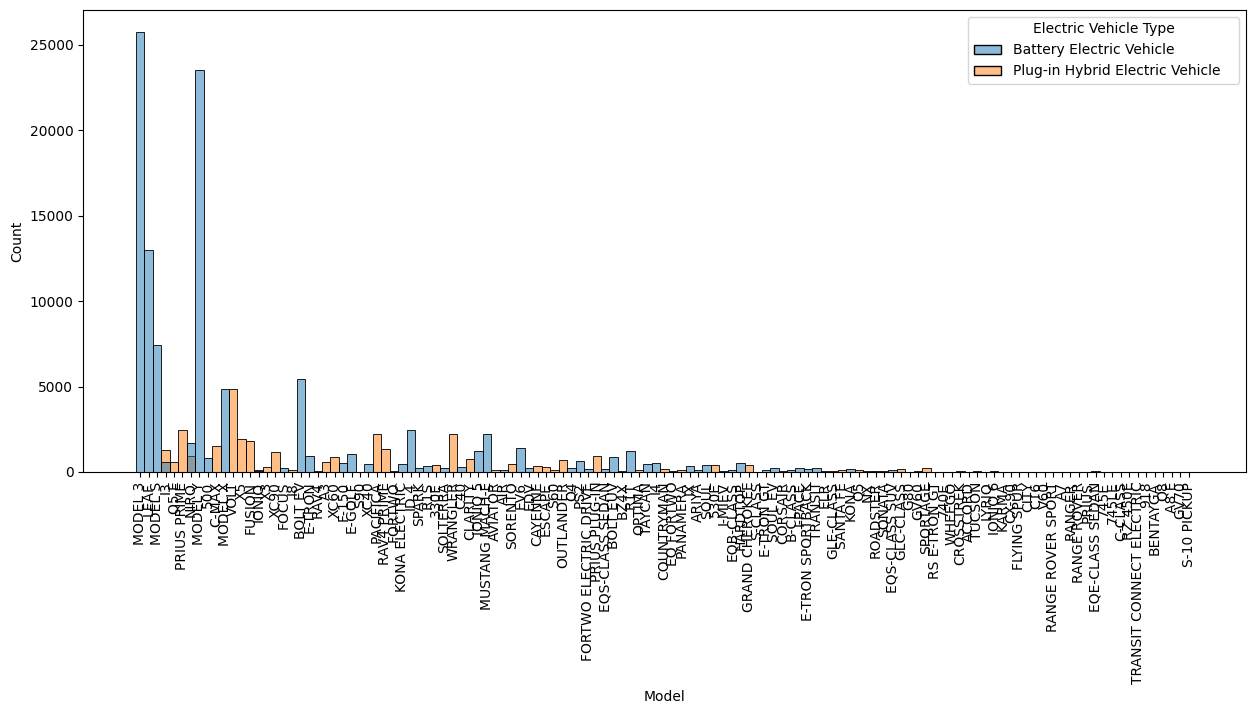

In [76]:
plt.figure(figsize=(15, 6))
sns.histplot(data=df, x='Model',hue='Electric Vehicle Type')
plt.xticks(rotation=90)

In [77]:
top_most=df["Model"].value_counts().head(10)
top_most.to_csv("top_most.csv")

In [78]:
top_most

Model
MODEL 3        25752
MODEL Y        23531
LEAF           13008
MODEL S         7455
BOLT EV         5414
VOLT            4868
MODEL X         4866
NIRO            2603
ID.4            2473
PRIUS PRIME     2464
Name: count, dtype: int64

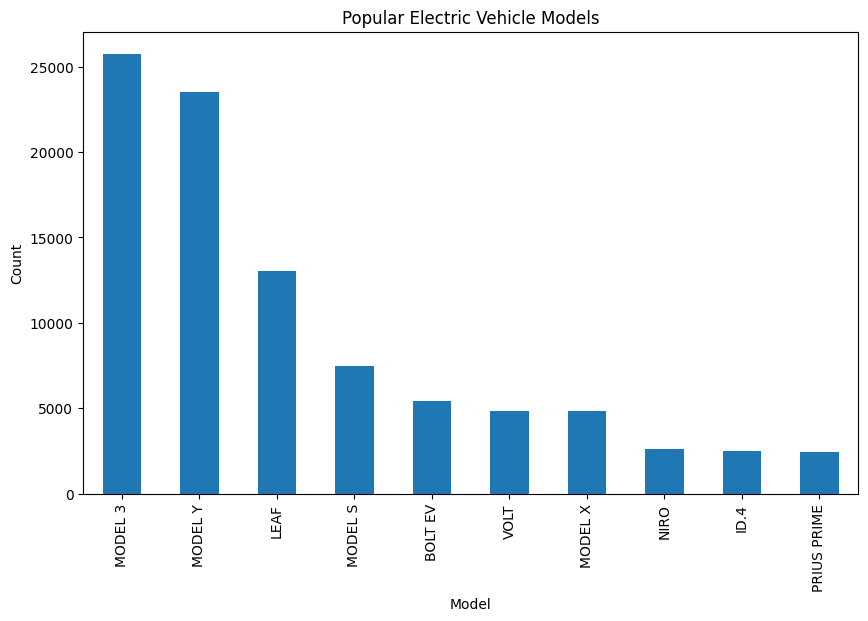

In [79]:
plt.figure(figsize=(10, 6))
top_most.plot(kind='bar')
plt.xlabel("Model")
plt.ylabel("Count")
plt.title("Popular Electric Vehicle Models")
plt.show()

<Axes: xlabel='Model Year', ylabel='Count'>

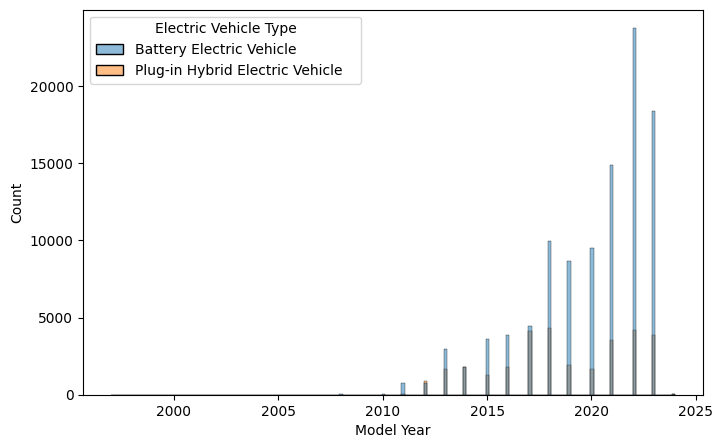

In [80]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Model Year',hue='Electric Vehicle Type')

<Axes: xlabel='CAFV', ylabel='count'>

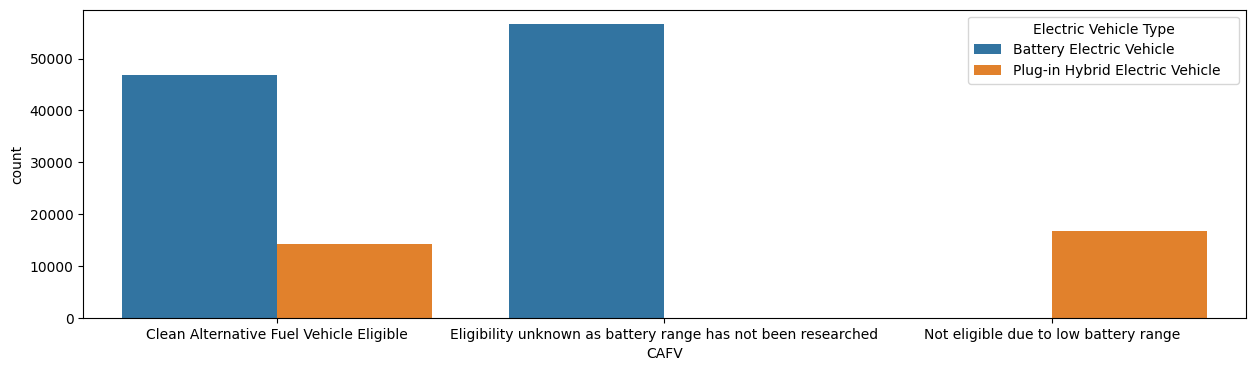

In [81]:
plt.figure(figsize=(15,4))
sns.countplot(data=df, x="CAFV",hue='Electric Vehicle Type')

<Axes: xlabel='Electric Range', ylabel='Make'>

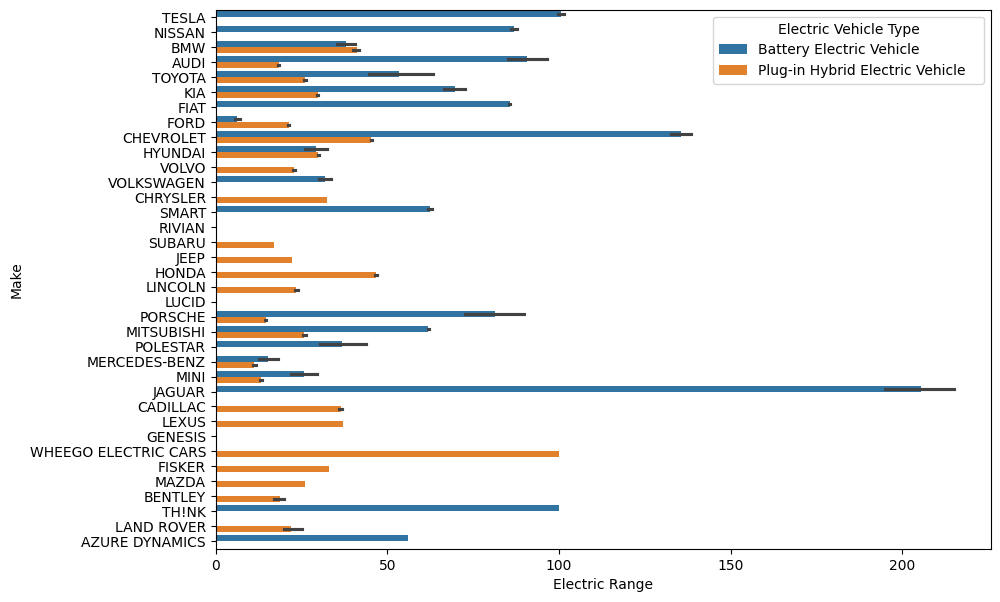

In [82]:
plt.figure(figsize=(10, 7))
sns.barplot(data=df, x='Electric Range',y='Make',hue='Electric Vehicle Type')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, 'TESLA'),
  Text(1, 0, 'NISSAN'),
  Text(2, 0, 'BMW'),
  Text(3, 0, 'AUDI'),
  Text(4, 0, 'TOYOTA'),
  Text(5, 0, 'KIA'),
  Text(6, 0, 'FIAT'),
  Text(7, 0, 'FORD'),
  Text(8, 0, 'CHEVROLET'),
  Text(9, 0, 'HYUNDAI'),
  Text(10, 0, 'VOLVO'),
  Text(11, 0, 'VOLKSWAGEN'),
  Text(12, 0, 'CHRYSLER'),
  Text(13, 0, 'SMART'),
  Text(14, 0, 'RIVIAN'),
  Text(15, 0, 'SUBARU'),
  Text(16, 0, 'JEEP'),
  Text(17, 0, 'HONDA'),
  Text(18, 0, 'LINCOLN'),
  Text(19, 0, 'LUCID'),
  Text(20, 0, 'PORSCHE'),
  Text(21, 0, 'MITSUBISHI'),
  Text(22, 0, 'POLESTAR'),
  Text(23, 0, 'MERCEDES-BENZ'),
  Text(24, 0, 'MINI'),
  Text(25, 0, 'JAGUAR'),
  Text(26, 0, 'CADILLAC'),
  Text(27, 0, 'LEXUS'),
  Text(28, 0, 'GENESIS'),
  Text(29, 0, 'WHEEGO ELECTRIC CARS'),
  Text(30, 0, 'FISKER'),
  Text(3

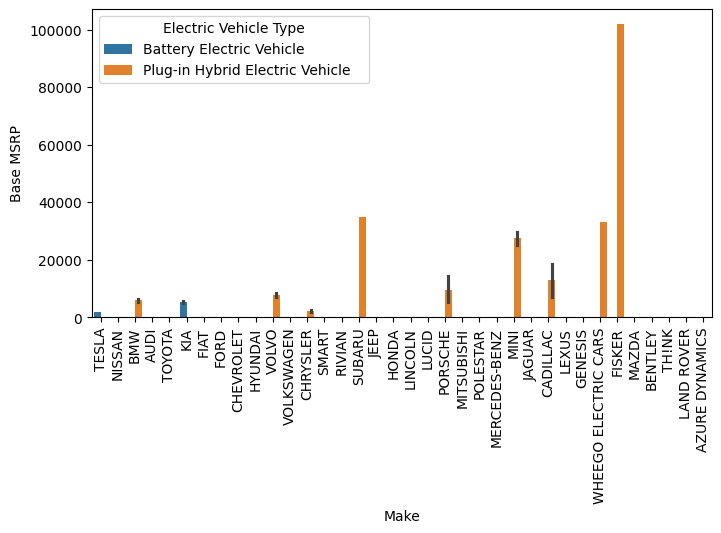

In [84]:
plt.figure(figsize=(8, 4))
sns.barplot(data=df, x='Make',y='Base MSRP',hue='Electric Vehicle Type')
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, 'TESLA'),
  Text(1, 0, 'NISSAN'),
  Text(2, 0, 'BMW'),
  Text(3, 0, 'AUDI'),
  Text(4, 0, 'TOYOTA'),
  Text(5, 0, 'KIA'),
  Text(6, 0, 'FIAT'),
  Text(7, 0, 'FORD'),
  Text(8, 0, 'CHEVROLET'),
  Text(9, 0, 'HYUNDAI'),
  Text(10, 0, 'VOLVO'),
  Text(11, 0, 'VOLKSWAGEN'),
  Text(12, 0, 'CHRYSLER'),
  Text(13, 0, 'SMART'),
  Text(14, 0, 'RIVIAN'),
  Text(15, 0, 'SUBARU'),
  Text(16, 0, 'JEEP'),
  Text(17, 0, 'HONDA'),
  Text(18, 0, 'LINCOLN'),
  Text(19, 0, 'LUCID'),
  Text(20, 0, 'PORSCHE'),
  Text(21, 0, 'MITSUBISHI'),
  Text(22, 0, 'POLESTAR'),
  Text(23, 0, 'MERCEDES-BENZ'),
  Text(24, 0, 'MINI'),
  Text(25, 0, 'JAGUAR'),
  Text(26, 0, 'CADILLAC'),
  Text(27, 0, 'LEXUS'),
  Text(28, 0, 'GENESIS'),
  Text(29, 0, 'WHEEGO ELECTRIC CARS'),
  Text(30, 0, 'FISKER'),
  Text(3

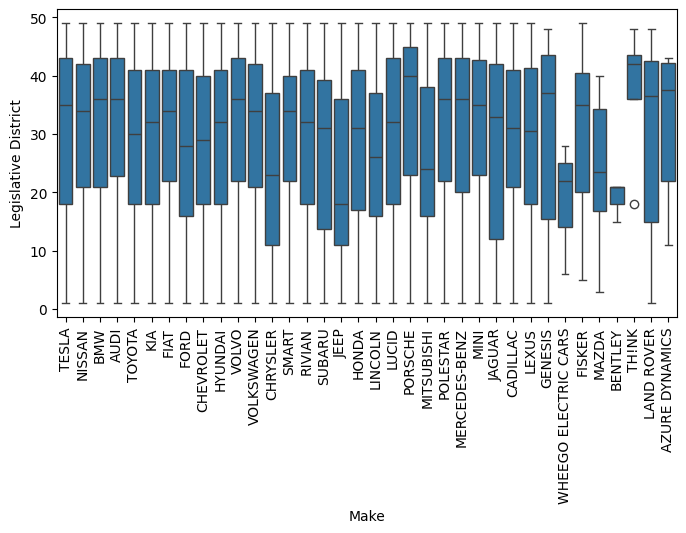

In [26]:
plt.figure(figsize=(8,4))
sns.boxplot(y="Legislative District",x="Make",data=df)
plt.xticks(rotation=90)

Text(0.5, 0, 'Models')

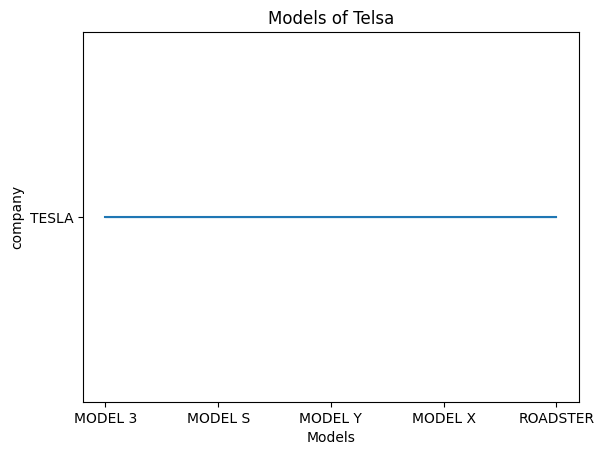

In [27]:
Tesla=df[df['Make']=='TESLA']
sns.lineplot(x='Model',y='Make',data=Tesla)

plt.title("Models of Telsa")
plt.ylabel('company')
plt.xlabel('Models')

<Axes: xlabel='latitude', ylabel='Longitude'>

C:\Users\Gayu\anaconda3\lib\site-packages\IPython\core\events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\Gayu\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


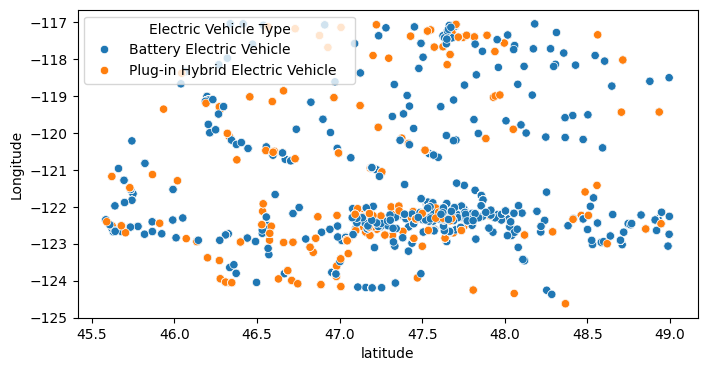

In [28]:
plt.figure(figsize=(8,4))
sns.scatterplot(y='Longitude',x='latitude',hue='Electric Vehicle Type',data=df)

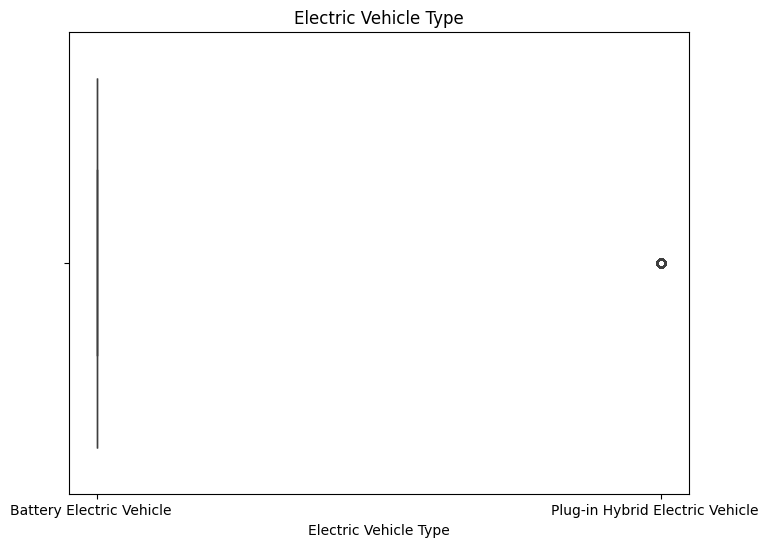

In [29]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Electric Vehicle Type'])
plt.title('Electric Vehicle Type')
plt.xlabel('Electric Vehicle Type')
plt.show()

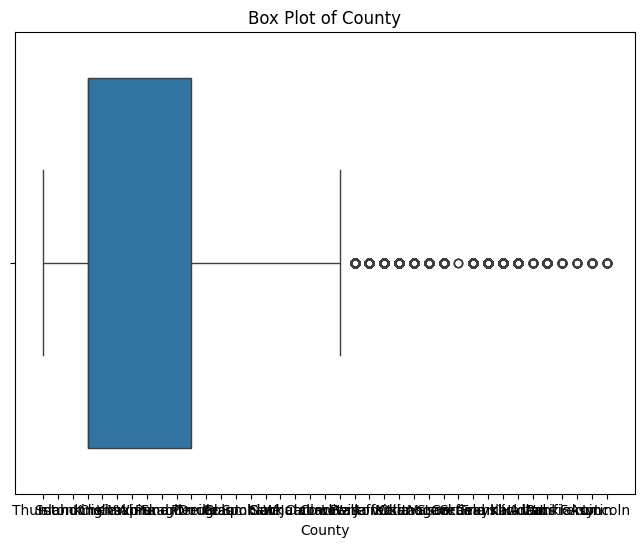

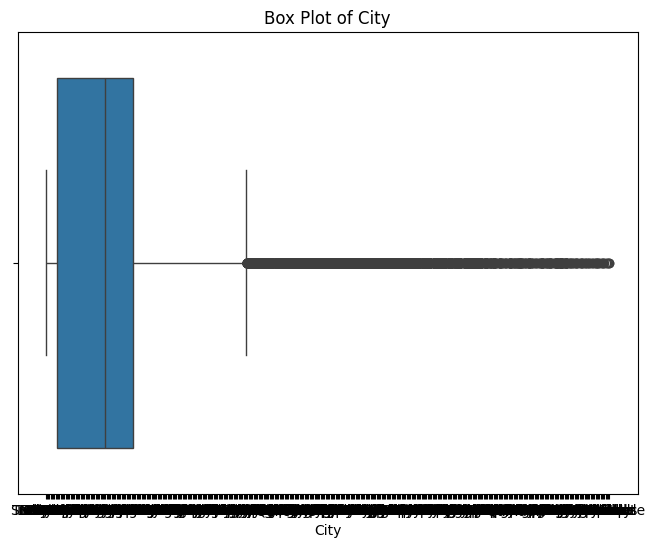

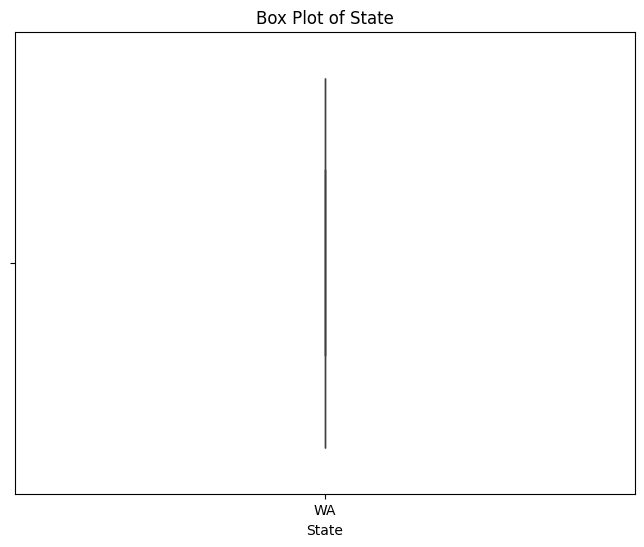

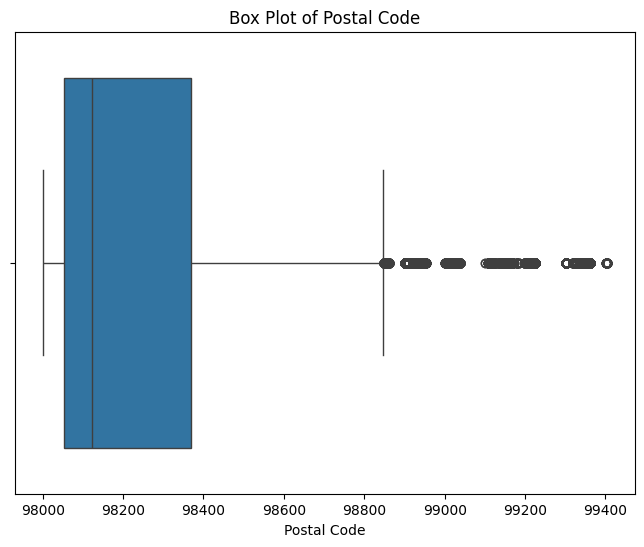

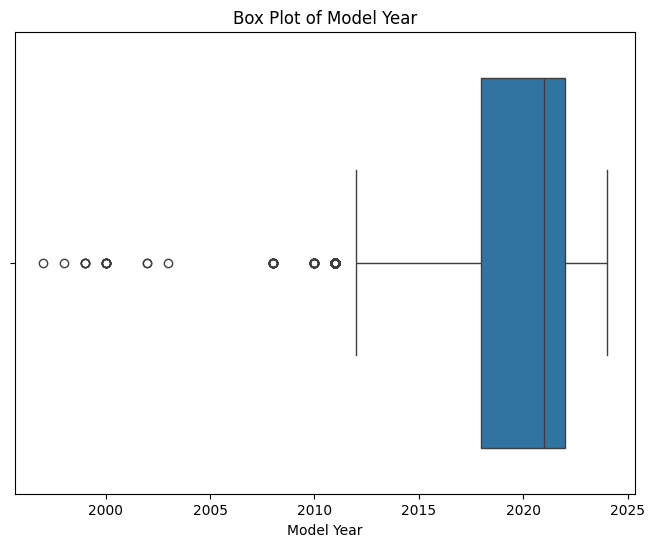

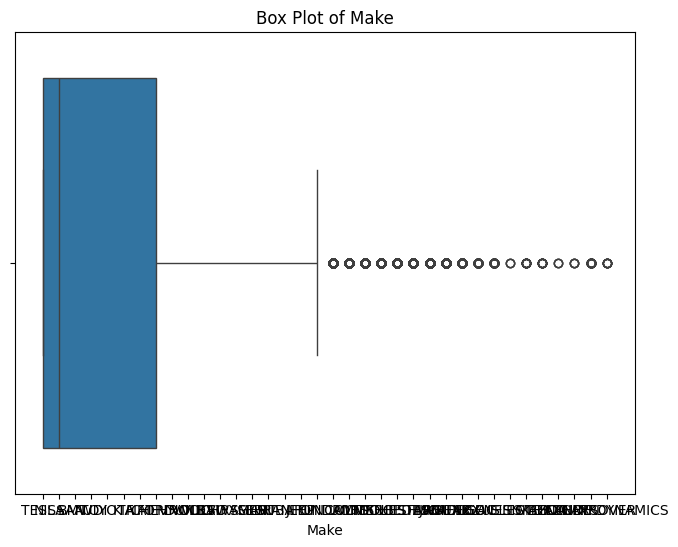

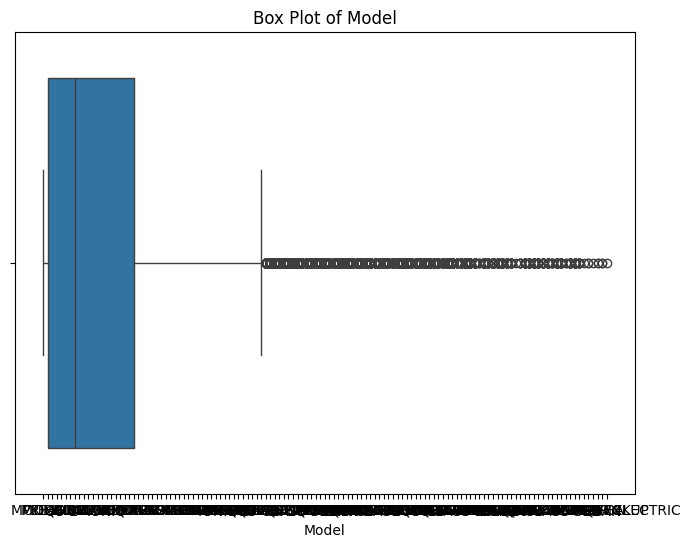

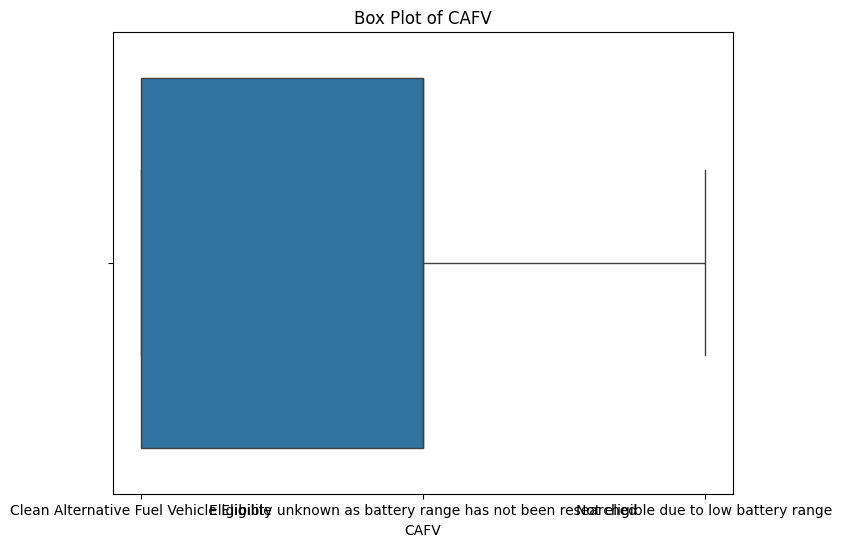

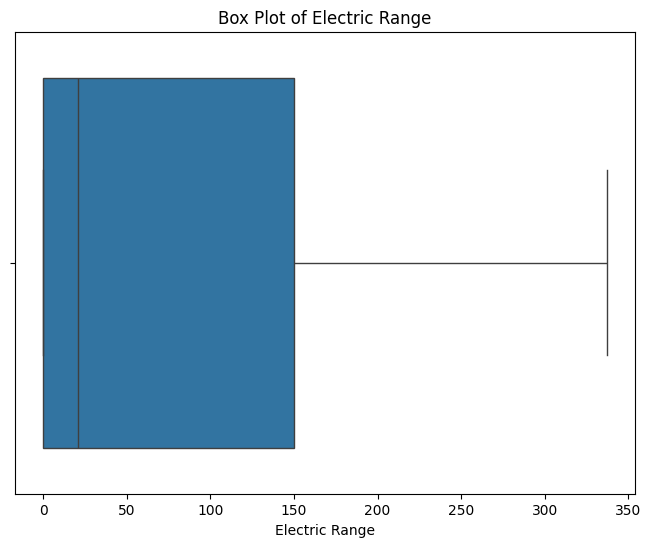

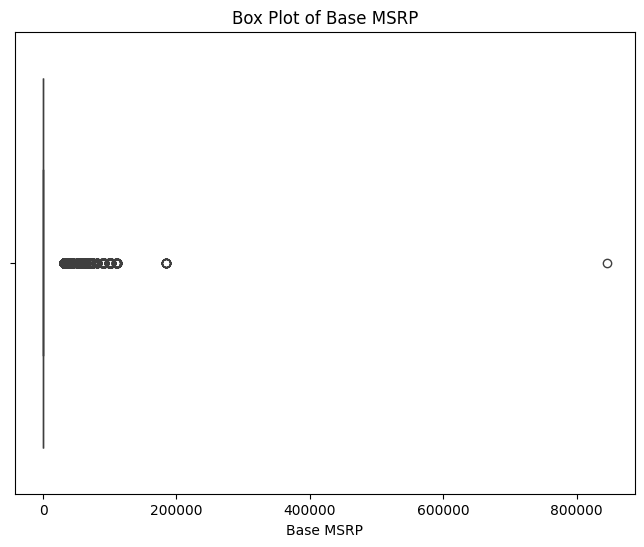

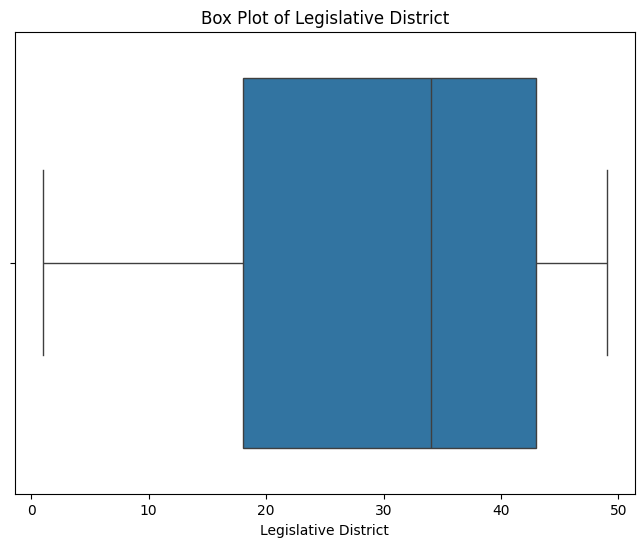

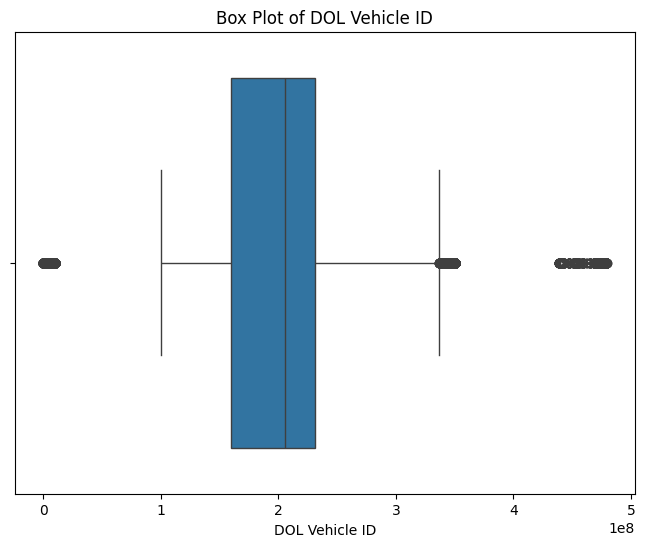

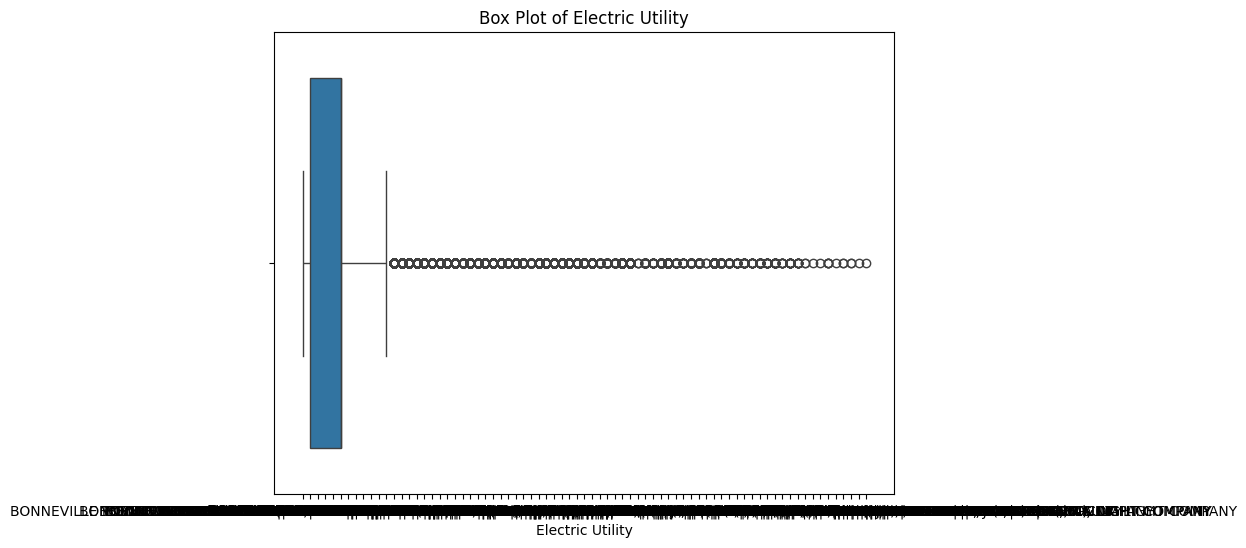

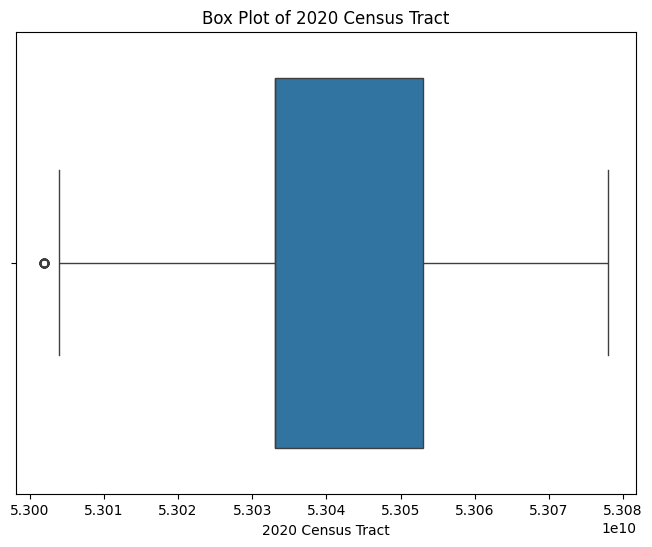

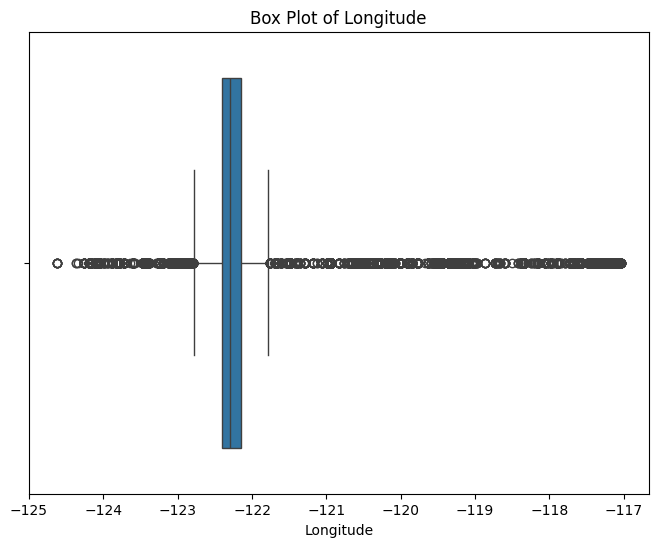

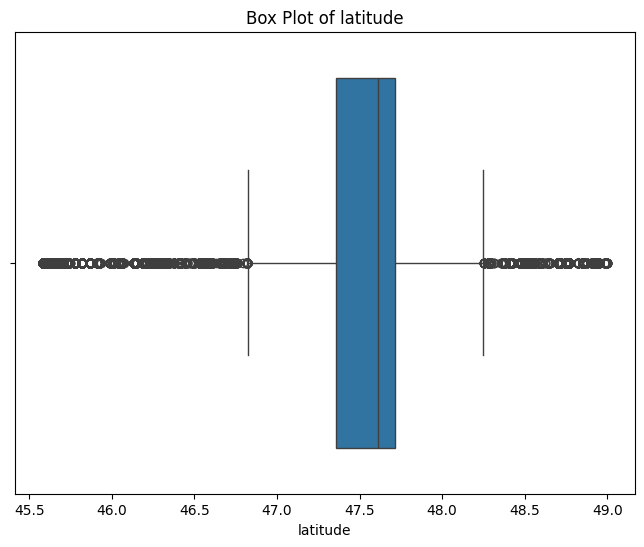

In [30]:
independent_variables = ['County', 'City', 'State','Postal Code','Model Year','Make','Model','CAFV','Electric Range','Base MSRP','Legislative District','DOL Vehicle ID','Electric Utility','2020 Census Tract','Longitude','latitude']

for variable in independent_variables:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[variable])
    plt.title(f'Box Plot of {variable}')
    plt.xlabel(variable)
    plt.show()

In [ ]:
#Dropping Irrelevant Columns




In [31]:
columns_to_drop = ['County', 'Electric Utility']
df=df.drop(columns_to_drop, axis=1)


In [ ]:
#data processing
#Encoding Categorical Variables




In [32]:
label_encoder = LabelEncoder()
categorical_columns = ['City', 'State', 'Make', 'Model', 'Electric Vehicle Type','CAFV']
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [33]:
one_hot_encoded = pd.get_dummies(df['Electric Vehicle Type'], prefix='EVType')
df = pd.concat([df, one_hot_encoded], axis=1)

In [34]:
df.head()

,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,CAFV,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract,Longitude,latitude,EVType_0,EVType_1
0,411,0,98512,2019,30,71,0,0,220,0,22,242565116,53067010910,-122.913102,47.013593,True,False
1,71,0,98236,2022,24,69,0,1,0,0,10,183272785,53029972000,-122.359364,47.979655,True,False
2,368,0,98290,2020,30,71,0,0,266,0,44,112552366,53061052502,-122.091505,47.915555,True,False
3,350,0,98134,2020,30,71,0,0,322,0,11,6336319,53033009300,-122.329815,47.579810,True,False
4,111,0,98020,2013,30,72,0,0,208,69900,21,186212960,53061050403,-122.375070,47.808070,True,False


In [ ]:
#StandardScaler




In [35]:
df = pd.DataFrame(df)
scaler = StandardScaler()
numerical_features = ['City', 'State','Postal Code','Model Year','Make','Model','CAFV','Electric Range','Base MSRP','Legislative District','DOL Vehicle ID','2020 Census Tract','Longitude','latitude']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

df

,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,CAFV,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract,Longitude,latitude,EVType_0,EVType_1
0,1.218322,0.0,0.834042,-0.218979,0.718253,0.027432,0,-0.977619,1.470704,-0.149754,-0.507222,0.421885,1.692193,-0.815000,-0.738083,True,False
1,-1.305374,0.0,-0.076645,0.780544,0.148362,-0.053124,0,0.480407,-0.756565,-0.149754,-1.318788,-0.268299,-0.597475,-0.264929,0.832054,True,False
2,0.899148,0.0,0.101533,0.114196,0.718253,0.027432,0,-0.977619,1.936406,-0.149754,0.980648,-1.091509,1.323857,0.001156,0.727873,True,False
3,0.765541,0.0,-0.413203,0.114196,0.718253,0.027432,0,-0.977619,2.503347,-0.149754,-1.251157,-2.327900,-0.409715,-0.235576,0.182188,True,False
4,-1.008468,0.0,-0.789356,-2.218025,0.718253,0.067710,0,-0.977619,1.349217,7.062480,-0.574853,-0.234074,1.323727,-0.280531,0.553178,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134469,1.515227,0.0,-0.842150,0.114196,0.718253,0.067710,0,-0.977619,2.584339,-0.149754,1.251169,-0.949214,-0.408801,-0.108513,0.237513,True,False
134470,-1.505785,0.0,-0.301017,0.447370,0.718253,0.148266,0,0.480407,-0.756565,-0.149754,0.236713,-0.738744,-0.408615,-0.192508,0.013677,True,False
134471,-0.785789,0.0,0.250015,0.780544,0.718253,0.067710,0,0.480407,-0.756565,-0.149754,-0.236701,0.161055,0.830544,-0.487626,-0.234475,True,False
134472,-0.934242,0.0,1.860215,1.113719,-0.991420,-0.294791,0,0.480407,-0.756565,-0.149754,-1.115896,0.204297,-0.904191,2.520732,-0.241120,True,False


In [ ]:
#Splitting Data into Train and Test 





In [36]:
x = ['Model Year', 'Make', 'Model']
y = 'Electric Vehicle Type'

In [37]:
x_train, x_test, y_train, y_test = train_test_split(df[x],df[y], test_size=0.2, random_state=42)

In [ ]:
#model building





In [ ]:
# LOGISTIC REGRESSION

In [38]:
model=LogisticRegression()

In [39]:
model.fit(x_train,y_train)

LogisticRegression()

In [40]:
ypred=model.predict(x_test)
accuracy = accuracy_score(y_test, ypred)
report = classification_report(y_test, ypred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test,ypred))

Accuracy: 0.859267521844209
              precision    recall  f1-score   support

           0       0.87      0.97      0.91     20726
           1       0.82      0.50      0.62      6169

    accuracy                           0.86     26895
   macro avg       0.84      0.73      0.77     26895
weighted avg       0.85      0.86      0.85     26895



In [41]:
model=LogisticRegression()

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
}
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
y_pred = grid_search.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best Hyperparameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'saga'}
Accuracy: 0.8603829708124187


In [ ]:
# RANDOM FOREST CLASSIFIER

In [42]:
rf_model=RandomForestClassifier()

In [43]:
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [44]:
ypred=rf_model.predict(x_test)

In [45]:
accuracy = accuracy_score(y_test, ypred)
report = classification_report(y_test, ypred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test,ypred))

Accuracy: 0.9899981409183863
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     20726
           1       0.98      0.98      0.98      6169

    accuracy                           0.99     26895
   macro avg       0.99      0.99      0.99     26895
weighted avg       0.99      0.99      0.99     26895



In [ ]:
# SUPPORT VECTOR CLASSIFIER

In [46]:
sv_model=SVC()

In [47]:
sv_model.fit(x_train,y_train)

SVC()

In [48]:
ypred=sv_model.predict(x_test)

In [49]:
accuracy = accuracy_score(y_test, ypred)
report = classification_report(y_test, ypred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test,ypred))

Accuracy: 0.9689533370514966
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     20726
           1       0.94      0.93      0.93      6169

    accuracy                           0.97     26895
   macro avg       0.96      0.95      0.96     26895
weighted avg       0.97      0.97      0.97     26895

